In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = stopwords.words('english')
clothes = ['good', 'course', 'assignment', 'teacher', 'professor', 'instructor', 'lecture',
           'video', 'content', 'great', 'easy', 'interesting', 'material', 'time',
           'machine lreaning']
lem = WordNetLemmatizer()


def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]", " ", words)
    text = words.lower().split()
    return " ".join(text)


def remove_stopwords(review):
    """The function to removing stopwords"""
    text = [word.lower() for word in review.split() if word.lower() not in
            stop_words and word.lower() not in clothes]
    return " ".join(text)


def remove_numbers(text):
    """The function to removing all numbers"""
    new_text = []
    for word in text.split():
        if not re.search('\\d', word):
            new_text.append(word)
    return ' '.join(new_text)


def get_lemmatize(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)


# Load dataset

dataset = pd.read_csv("reviews.csv", header=0, index_col=0)

# shape
print(dataset.shape)
print(dataset.head(5))

dataset['Review'] = dataset['Review'].astype(str)
dataset['Review'] = dataset['Review'].apply(clean_text)
dataset['Review'] = dataset['Review'].apply(remove_stopwords)
dataset['Review'] = dataset['Review'].apply(remove_numbers)
dataset['Review'] = dataset['Review'].apply(get_lemmatize)
print(dataset[:5])

data = dataset.to_csv('review_clean.csv',
                      encoding='utf-8')

(107018, 2)
                                               Review  Label
Id                                                          
0                                good and interesting      5
1   This class is very helpful to me. Currently, I...      5
2   like!Prof and TAs are helpful and the discussi...      5
3   Easy to follow and includes a lot basic and im...      5
4   Really nice teacher!I could got the point eazl...      4
                                               Review  Label
Id                                                          
0                                                          5
1   class helpful currently still learning class m...      5
2   like prof ta helpful discussion among student ...      5
3   follow includes lot basic important technique ...      5
4                really nice could got point eazliy v      4


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import trim_mean

In [4]:
df = pd.read_csv('Reviews.csv', header=0,index_col=0)
df.head()

,Review,Label
Id,,
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107018 entries, 0 to 107017
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  107018 non-null  object
 1   Label   107018 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
df['Review'][2]

'like!Prof and TAs are helpful and the discussion among students are quite active. Very rewarding learning experience!'

In [7]:
df_text = df[['Review', 'Label']]
df_text.head()

,Review,Label
Id,,
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4


In [8]:
df_text.isnull().sum()

Review    0
Label     0
dtype: int64

In [9]:
df_text.dropna(subset=['Review'], inplace=True)

In [10]:
df_text.nunique()

Review    100034
Label          5
dtype: int64

Text(0.5, 1.0, 'Distribution of Rating')

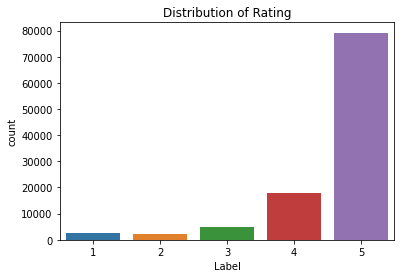

In [11]:
sns.countplot(x='Label',data=df_text)
plt.title("Distribution of Rating")

In [12]:
df_text['Review_length'] = df_text['Review'].apply(len)
df_text.head()

,Review,Label,Review_length
Id,,,
0,good and interesting,5,20
1,"This class is very helpful to me. Currently, I...",5,121
2,like!Prof and TAs are helpful and the discussi...,5,117
3,Easy to follow and includes a lot basic and im...,5,81
4,Really nice teacher!I could got the point eazl...,4,58


Text(0.5, 1.0, 'Histogram of review length')

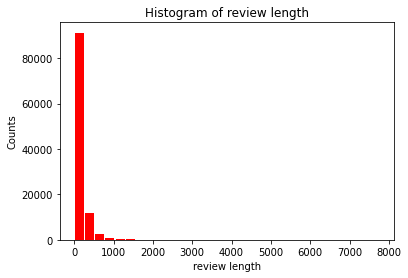

In [13]:
df_text["Review_length"].plot(bins=30, rwidth=0.9, kind='hist', color="red")
plt.xlabel("review length")
plt.ylabel("Counts")
plt.title("Histogram of review length")

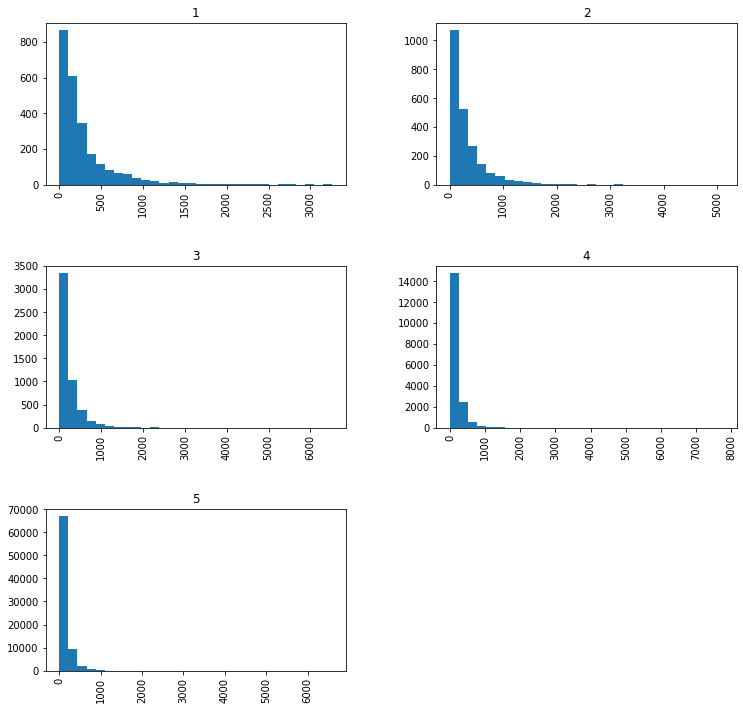

In [14]:
df_text.hist(column='Review_length', by='Label', bins=30,figsize=(12,12));

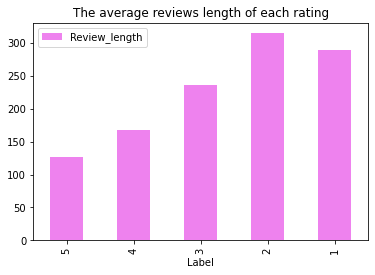

In [15]:
df_text.groupby('Label')[['Review_length']].mean().sort_values('Label', ascending=False).plot(kind='bar', 
                                                color=['violet'], title='The average reviews length of each rating');

In [16]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [18]:
df['Review_clear'] = df['Review'].apply(tokens)
df.head()

,Review,Label,Review_clear
Id,,,
0,good and interesting,5,good and interesting
1,"This class is very helpful to me. Currently, I...",5,this class is very helpful to me currently i m...
2,like!Prof and TAs are helpful and the discussi...,5,like prof and tas are helpful and the discussi...
3,Easy to follow and includes a lot basic and im...,5,easy to follow and includes a lot basic and im...
4,Really nice teacher!I could got the point eazl...,4,really nice teacher i could got the point eazl...


In [19]:
df['Review_clear'] = df['Review_clear'].astype(str)

In [20]:
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [21]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words ]
    return " ".join(text)

In [23]:
df['Review_clear'] = df['Review_clear'].apply(stopwords)
df.head()

,Review,Label,Review_clear
Id,,,
0,good and interesting,5,good interesting
1,"This class is very helpful to me. Currently, I...",5,class helpful currently still learning class m...
2,like!Prof and TAs are helpful and the discussi...,5,like prof tas helpful discussion among student...
3,Easy to follow and includes a lot basic and im...,5,easy follow includes lot basic important techn...
4,Really nice teacher!I could got the point eazl...,4,really nice teacher could got point eazliy v


In [24]:
def numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)  

In [25]:
df['Review_clear'] = df['Review_clear'].apply(numbers)
df.head()

,Review,Label,Review_clear
Id,,,
0,good and interesting,5,good interesting
1,"This class is very helpful to me. Currently, I...",5,class helpful currently still learning class m...
2,like!Prof and TAs are helpful and the discussi...,5,like prof tas helpful discussion among student...
3,Easy to follow and includes a lot basic and im...,5,easy follow includes lot basic important techn...
4,Really nice teacher!I could got the point eazl...,4,really nice teacher could got point eazliy v


In [26]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [27]:
df['Review_clear'] = df['Review_clear'].apply(lemma)
df.head()

,Review,Label,Review_clear
Id,,,
0,good and interesting,5,good interesting
1,"This class is very helpful to me. Currently, I...",5,class helpful currently still learning class m...
2,like!Prof and TAs are helpful and the discussi...,5,like prof ta helpful discussion among student ...
3,Easy to follow and includes a lot basic and im...,5,easy follow includes lot basic important techn...
4,Really nice teacher!I could got the point eazl...,4,really nice teacher could got point eazliy v


In [34]:
df['Sentiment Label'] = np.where(df.Label > 3,1,0)

## Removing neutral reviews 
df = df[df.Label != 3]

# Printing the counts of each class
df['Sentiment Label'].value_counts()

1    97227
0     4720
Name: Sentiment Label, dtype: int64

In [38]:
positive = df[df.'Sentiment Label' == 1]
negative = df[df.'Sentiment Label' == 0]
positive.head()

SyntaxError: invalid syntax (<ipython-input-38-d2a79d80e0ad>, line 1)

In [39]:
df.head(10)

,Review,Label,Review_clear,Sentiment Label
Id,,,,
0,good and interesting,5,good interesting,1
1,"This class is very helpful to me. Currently, I...",5,class helpful currently still learning class m...,1
2,like!Prof and TAs are helpful and the discussi...,5,like prof ta helpful discussion among student ...,1
3,Easy to follow and includes a lot basic and im...,5,easy follow includes lot basic important techn...,1
4,Really nice teacher!I could got the point eazl...,4,really nice teacher could got point eazliy v,1
5,"Great course - I recommend it for all, especia...",5,great course recommend especially business man...,1
6,One of the most useful course on IT Management!,5,one useful course management,1
8,Super content. I'll definitely re-do the course,5,super content definitely course,1
9,One of the excellent courses at Coursera for i...,5,one excellent course coursera information tech...,1


In [41]:
df = df.rename(columns={"Sentiment Label": "Sentiment"})
df.head()

,Review,Label,Review_clear,Sentiment
Id,,,,
0,good and interesting,5,good interesting,1
1,"This class is very helpful to me. Currently, I...",5,class helpful currently still learning class m...,1
2,like!Prof and TAs are helpful and the discussi...,5,like prof ta helpful discussion among student ...,1
3,Easy to follow and includes a lot basic and im...,5,easy follow includes lot basic important techn...,1
4,Really nice teacher!I could got the point eazl...,4,really nice teacher could got point eazliy v,1


In [72]:
from textblob import TextBlob
df['sentiment polarity'] = df['Review_clear'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head()

,Review,Label,Review_clear,Sentiment,sentiment polarity
Id,,,,,
0,good and interesting,5,good interesting,1,0.600000
1,"This class is very helpful to me. Currently, I...",5,class helpful currently still learning class m...,1,0.000000
2,like!Prof and TAs are helpful and the discussi...,5,like prof ta helpful discussion among student ...,1,0.183333
3,Easy to follow and includes a lot basic and im...,5,easy follow includes lot basic important techn...,1,0.277778
4,Really nice teacher!I could got the point eazl...,4,really nice teacher could got point eazliy v,1,0.600000


In [73]:
positive = df[df.Sentiment == 1]
negative = df[df.Sentiment== 0]
positive.head()

,Review,Label,Review_clear,Sentiment,sentiment polarity
Id,,,,,
0,good and interesting,5,good interesting,1,0.600000
1,"This class is very helpful to me. Currently, I...",5,class helpful currently still learning class m...,1,0.000000
2,like!Prof and TAs are helpful and the discussi...,5,like prof ta helpful discussion among student ...,1,0.183333
3,Easy to follow and includes a lot basic and im...,5,easy follow includes lot basic important techn...,1,0.277778
4,Really nice teacher!I could got the point eazl...,4,really nice teacher could got point eazliy v,1,0.600000


In [74]:
negative.head()

,Review,Label,Review_clear,Sentiment,sentiment polarity
Id,,,,,
17,This course does not say anything about digiti...,2,course say anything digitization core subject ...,0,-0.083333
49,This course doesn't contain any new informatio...,1,course contain new information teach excitedly...,0,0.177841
70,"While there is some interesting content, parti...",2,interesting content particuarly last week desi...,0,0.358333
71,I do not find very interesting this course. to...,1,find interesting course many interview could w...,0,0.250000
79,A lot of speaking without any sense. Skip it a...,1,lot speaking without sense skip cost,0,0.000000


In [45]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:48]

'good interesting class helpful currently still l'

In [46]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'course say anything digitization core subject digital wave course contain new information teach excitedly show commonly known fact better way invest time interesting content particuarly last week design thinking course topic seem hold together well video include lot monotonous talking head conveys benefit able listen video without consistently watching interview question asked speaker sometimes printed screen asked verbally watching miss question woul'

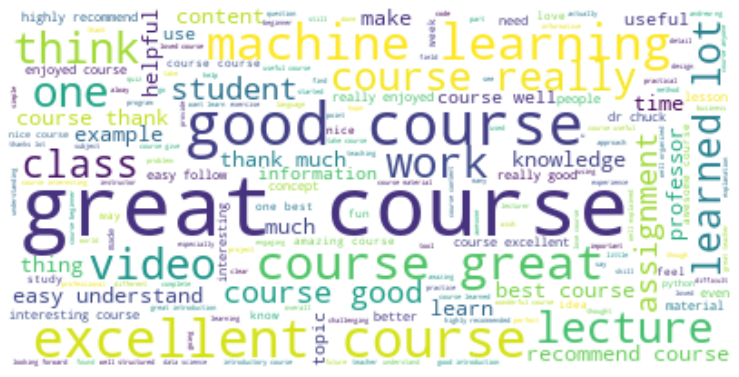

In [48]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

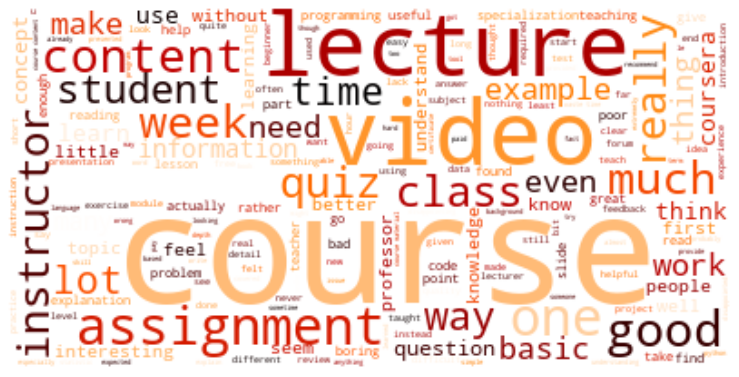

In [49]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X = df['Review_clear']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

32760

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.9588033349681216
              precision    recall  f1-score   support

           0       0.78      0.17      0.28       958
           1       0.96      1.00      0.98     19432

    accuracy                           0.96     20390
   macro avg       0.87      0.58      0.63     20390
weighted avg       0.95      0.96      0.95     20390



In [94]:
categ = ['Negative', 'Positive']
custom_dt = [ "execellent course"]

In [95]:
print(categ[int(model_rf.predict(custom_dt))])

Positive
